A notebook for analysing the reddit database. includes exclamation marks counts, word clouds, linear regression, and more. More details are explained in our research paper at the reddit analysis section.

In [ ]:
!pip install WordCloud -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install PyDrive
!pip install Numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!python -m pip uninstall matplotlib
#!pip install matplotlib==3.1.3

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1U0pQDPYFG1m4ajKU_knjZCQmDMh9jQBp"})
downloaded.GetContentFile('train-balanced-sarcasm.csv')        

In [ ]:
import pandas as pd
data = pd.read_csv('train-balanced-sarcasm.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Drop rows that have null values for the 'comment' column

In [ ]:
data['comment'] = data['comment'].dropna()
data['label'] = data['label'].dropna()
sarcastic = data.loc[data['label']==1]
non_sarcastic = data.loc[data['label']==0]
sarc_comments = [x for x in sarcastic['comment'].tolist() if type(x) is str and len(x) < 150]
non_sarc_comments = [x for x in non_sarcastic['comment'].tolist() if type(x) is str and len(x) < 150]
print("num of sarcastics comments:",len(sarc_comments))
print("num of non sarcastics comments:",len(non_sarc_comments))

num of sarcastics comments: 459645
num of non sarcastics comments: 451659


In [ ]:
a = [int(x) for x in data['label'].tolist() if str(x).isdigit() and int(x) == 1]
len(a)

505413

Counting excalmation marks

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


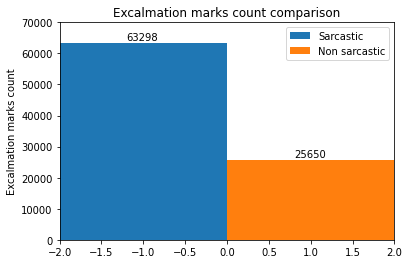

In [ ]:
import matplotlib.pyplot as plt

sarc_excal_count = 0
non_sarc_excal_count = 0
for com in sarc_comments:
  if '!' in com:
      sarc_excal_count += 1
for com in non_sarc_comments:
  if '!' in com:
    non_sarc_excal_count += 1


fig, ax = plt.subplots()
plt.bar(-1, sarc_excal_count, 2, label='Sarcastic')
plt.bar(1, non_sarc_excal_count, 2, label='Non sarcastic')
plt.axis([-2, 2, 0, 70000])
ax.set_xticks([-1,1], ['sarcastic', 'non sarcastic'])

ax.annotate(str(sarc_excal_count),(-1.2,sarc_excal_count+1000))
ax.annotate(str(non_sarc_excal_count),(0.8,non_sarc_excal_count+1000))
ax.set_ylabel('Excalmation marks count')
ax.set_title('Excalmation marks count comparison')
ax.legend()

plt.show()

Comparing sentiment

In [ ]:
# from transformers import pipeline

# model_path = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

# classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
# sarc_sentiment = classifier(sarc_comments[:20000])
# non_sarc_sentiment = classifier(non_sarc_comments[:20000])

# sarc_pos = [x['score'] for x in sarc_sentiment if x['label'] == 'Positive']
# sarc_neg = [x['score'] for x in sarc_sentiment if x['label'] == 'Negative']
# sarc_neu = [x['score'] for x in sarc_sentiment if x['label'] == 'Neutral']
# non_sarc_pos = [x['score'] for x in non_sarc_sentiment if x['label'] == 'Positive']
# non_sarc_neg = [x['score'] for x in non_sarc_sentiment if x['label'] == 'Negative']
# non_sarc_neu = [x['score'] for x in non_sarc_sentiment if x['label'] == 'Neutral']

#my_bar_plot(['S','N'],[sarc_pos_mean,non_sarc_pos_mean],[sarc_neg_mean,non_sarc_pos_mean],'Positive','Negative','Sentiment','sentiment comparison')


In [ ]:
# import numpy as np

# print("Positive sarcasm:    ",len(sarc_pos), "  Avarage score:", np.mean(sarc_pos))
# print("Neutral sarcasm:     ",len(sarc_neu), "  Avarage score:", np.mean(sarc_neg))
# print("Negative sarcasm:    ",len(sarc_neg), "  Avarage score:", np.mean(sarc_neg))
# print("Positive non sarcasm:",len(non_sarc_pos), "  Avarage score:", np.mean(non_sarc_pos))
# print("Neutral non sarcasm:",len(non_sarc_neu), "  Avarage score:", np.mean(non_sarc_pos))
# print("Negative non sarcasm:",len(non_sarc_neg), "  Avarage score:", np.mean(non_sarc_neg))

Word clouds

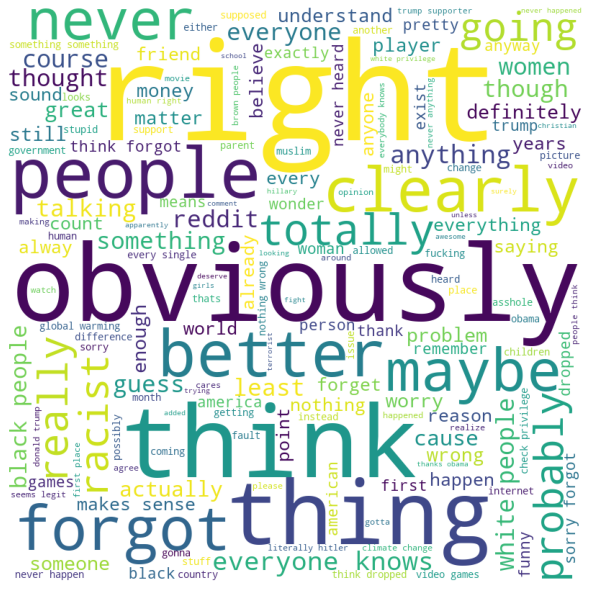

In [ ]:
from wordcloud import WordCloud, STOPWORDS

sarc_words = ''
stopwords = set(STOPWORDS)
 
for sarc_com in sarc_comments:

    tokens = [w.lower() for w in sarc_com.split()]         
    sarc_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_word_length=5, collocation_threshold=3,
                min_font_size = 10).generate(sarc_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

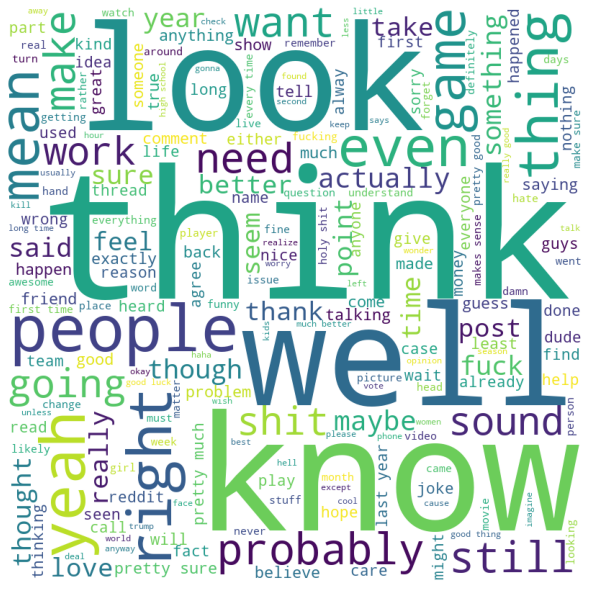

In [ ]:
non_sarc_words = ''
for non_sarc_com in non_sarc_comments:

    tokens = [w.lower() for w in non_sarc_com.split()]         
    non_sarc_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_word_length=4, collocation_threshold=3,
                min_font_size = 10).generate(non_sarc_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

X = []
Y = []

for x,y in zip(data['comment'].tolist(), data['label'].tolist()):
  if type(x) is str and len(x) < 150 and str(y).isdigit():
    X.append(x.lower())
    Y.append(int(y))

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42)
lr_clf = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2))),('clf',  LogisticRegression(penalty = 'l2', random_state= 42, solver='liblinear'))])
lr_clf.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [ ]:

print(f"The accuracy on the training set is: {lr_clf.score(X_train,Y_train)}")
print(f"The accuracy on the test set is:  {lr_clf.score(X_test,Y_test)}")

The accuracy on the training set is: 0.8162470343887762
The accuracy on the test set is:  0.7210736084259954


In [ ]:
Y_pred = lr_clf.predict(X_test)
report = classification_report(Y_pred,Y_test, output_dict=True)
report = pd.DataFrame(report).transpose()
report = report.rename({"0": "Sarcastic Comments", "1": "Non Sarcastic Comments"})
report

,precision,recall,f1-score,support
Sarcastic Comments,0.732224,0.713417,0.722698,124121.000000
Non Sarcastic Comments,0.710084,0.729026,0.719430,119506.000000
accuracy,0.721074,0.721074,0.721074,0.721074
macro avg,0.721154,0.721221,0.721064,243627.000000
weighted avg,0.721363,0.721074,0.721095,243627.000000


In [ ]:
import eli5
eli5.explain_weights(lr_clf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+10.956,obviously
+10.204,clearly
+9.792,because
+9.605,yes because
+9.151,totally
+8.176,yeah because
+6.816,how dare
+6.809,duh
+6.640,shitlord
+6.628,good thing


In [ ]:
sarcastics_words = ["obviously", "clearly", "totally", "duh", "everyone knows", "right because", "yeah obviously", "yes because", "yeah because","shitlord",
                    " definitely ", "of course", "surely", "how dare", "duh", " gee ", "for sure", "amirite", "good thing that","how i love", "what a surprise"]
count = 0
sarcs_for_sure = [[i,m] for i,m in enumerate(X) if any(z in m for z in sarcastics_words) and "!" in m]

for x in sarcs_for_sure:
  if Y[x[0]] == 1:
    x[0] = 1
    count += 1
  else:
    x[0] = 0
    
print ("precision: ",count / len(sarcs_for_sure))
print("found: ", len(sarcs_for_sure))
print("total: ", len([x for x in Y if x == 1]))
print(len(sarcs_for_sure) / len([x for x in Y if x == 1]))


precision:  0.9321307376317199
found:  5599
total:  492025
0.011379503074030791


In [ ]:
import numpy as np

sarcastics_words = ["obviously", "clearly", "totally", "duh", "everyone knows", "right because", "yeah obviously", "yes because", "yeah because","shitlord",
                    " definitely ", "of course", "surely", "how dare", "duh", " gee ", "for sure", "amirite", "good thing that","how i love", "what a surprise"]

features = np.zeros((len(X), len(sarcastics_words)))
for i in range(features.shape[0]):
  for j in range(features.shape[1]):
    if sarcastics_words[j] in X[i]:
      features[i][j] = 1


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(features,Y,random_state=42)
lgr = LogisticRegression(random_state=0).fit(X_train, Y_train)

In [ ]:
print(f"The accuracy on the training set is: {lgr.score(X_train,Y_train)}")
print(f"The accuracy on the test set is:  {lgr.score(X_test,Y_test)}")

Y_pred = lgr.predict(X_test)
report = classification_report(Y_test,Y_pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report = report.rename({"0": "Sarcastic Comments", "1": "Non Sarcastic Comments"})
report

The accuracy on the training set is: 0.5277624993500968
The accuracy on the test set is:  0.5292681024681173


,precision,recall,f1-score,support
Sarcastic Comments,0.513435,0.987539,0.675611,120933.000000
Non Sarcastic Comments,0.863311,0.077575,0.142358,122694.000000
accuracy,0.529268,0.529268,0.529268,0.529268
macro avg,0.688373,0.532557,0.408984,243627.000000
weighted avg,0.689637,0.529268,0.407057,243627.000000


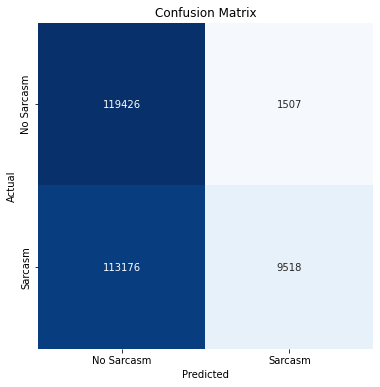

In [ ]:
import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred, labels=[0, 1])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["No Sarcasm", "Sarcasm"])
plt.yticks(ticks=[0.5, 1.5], labels=["No Sarcasm", "Sarcasm"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def get_features(str):
  ret = np.zeros(len(sarcastics_words))
  for i in range(len(sarcastics_words)):
    if sarcastics_words[i] in str:
      ret[i] = 1
  return ret

In [ ]:
#lgr.predict([get_features("Hello world")])
count_1 = 0
for i in Y_pred:
  if i == '1':
     count_1 += 1

print(Y_pred[0])
print(count_1)
print(count_1 / len(Y_pred))

0
33561
0.13775566747527984


In [ ]:
eli5.explain_weights(lgr)

Weight?,Feature
+3.451,x5
+3.359,x9
+2.961,x8
+2.614,x4
+2.598,x16
+2.363,x0
+2.110,x2
+2.105,x1
+1.386,x13
+1.361,x18
